# Water level prediction using ERA5

## Problem description
Given a set of  5,000  nodes over the Northern Adriatic Sea, defined by varying longitude and latitude (visualized as red spots in image below), you are supposed to infer the water level of these points at each hour in a given range, using a neural network.

In [ ]:
#import base64
#from IPython.display import HTML, display

#with open("graphical_visualization.png", "rb") as f:
#    encoded = base64.b64encode(f.read()).decode("utf-8")
#
#display(HTML(f"""<img src="data:image/png;base64,{encoded}" width="800"/>"""))

The information you can use to predict these values are:
* **latitude** and **longitude** of the nodes
* the **ephemerides** relative to the sun and the moon at each hour (we consider a single value of the ephemeridies for the whole region). Ephemerides are key predictors of tidal motion and are therefore important for the prediction of water level. The provided values of the ephemerides are already normalized.
* **weather variables** (wind components and pressure) derived from ERA5 dataset (not normalized). Due to the low resolution of ERA5, these values are organized as an array of shape $5 \times 9$ for each hour and each variable. A supporting function is provided to convert a given (latitude, longitude) of a node to the associated index of ERA5 array. Weather variables are important to predict phenomenon such as storm surge: another key component of water level.

For the prediction of the water level at timestamp $t$, you are allowed to use a sequence of any length of the input variables relative to past timesteps, but no future information. The output variable (corresponding to the **water level**) **CANNOT** be used as input to the model, not even for past timestamps.   


# Data Download

In [ ]:
import gdown

train data

In [1]:
!gdown 1Ncexf_vB55cpiCeNr-hIRrdpquYaav6B

Downloading...
From (original): https://drive.google.com/uc?id=1Ncexf_vB55cpiCeNr-hIRrdpquYaav6B
From (redirected): https://drive.google.com/uc?id=1Ncexf_vB55cpiCeNr-hIRrdpquYaav6B&confirm=t&uuid=28e592c2-0ed3-417c-b887-cf86f8af9555
To: /content/wl_2010-2020.npy
100% 1.75G/1.75G [00:16<00:00, 105MB/s] 


In [2]:
!gdown 1THbGvO9mVjg_wfZTabRbQBOVpaECl3my

Downloading...
From: https://drive.google.com/uc?id=1THbGvO9mVjg_wfZTabRbQBOVpaECl3my
To: /content/dist_alt_az_moon-sun_coord13-45_2010-2019_norm.npy
100% 4.21M/4.21M [00:00<00:00, 10.3MB/s]


In [3]:
!gdown 16M1zB54PKkKS6SK8W_U83UURWu1T_AxR

Downloading...
From: https://drive.google.com/uc?id=16M1zB54PKkKS6SK8W_U83UURWu1T_AxR
To: /content/ERA5_adriatic_u10v10sp_2010-2019.npy
100% 94.7M/94.7M [00:02<00:00, 39.1MB/s]


In [4]:
!gdown 161OYs8KQSn3RrXezCNwFvOewXLJe5wBf

Downloading...
From: https://drive.google.com/uc?id=161OYs8KQSn3RrXezCNwFvOewXLJe5wBf
To: /content/tvec_2010-2019.npy
100% 4.21M/4.21M [00:00<00:00, 37.3MB/s]


test data

In [5]:
!gdown 1iwqd4xzHc98OYqBpGsuUW4SG5AQDtdNR #(8784, 5000)  hours,nodes water levels

Downloading...
From (original): https://drive.google.com/uc?id=1iwqd4xzHc98OYqBpGsuUW4SG5AQDtdNR
From (redirected): https://drive.google.com/uc?id=1iwqd4xzHc98OYqBpGsuUW4SG5AQDtdNR&confirm=t&uuid=fa33cba0-0b9c-40dd-9331-581277cf12e0
To: /content/wl_2020.npy
100% 176M/176M [00:05<00:00, 33.9MB/s]


In [6]:
!gdown 1cHqyeXtmaiC_3v9uadMD7Y0hONGf2R1q

Downloading...
From: https://drive.google.com/uc?id=1cHqyeXtmaiC_3v9uadMD7Y0hONGf2R1q
To: /content/dist_alt_az_moon-sun_coord13-45_2020_norm.npy
100% 422k/422k [00:00<00:00, 118MB/s]


In [7]:
!gdown 1AoFAD2viMarikhU5b5Etdsklx08EzKKb

Downloading...
From: https://drive.google.com/uc?id=1AoFAD2viMarikhU5b5Etdsklx08EzKKb
To: /content/ERA5_adriatic_u10v10sp_2020.npy
100% 4.74M/4.74M [00:00<00:00, 17.3MB/s]


In [8]:
!gdown 1sWoTlJih-mqDdP9TBzhyXTqHHS5Jr9fe

Downloading...
From: https://drive.google.com/uc?id=1sWoTlJih-mqDdP9TBzhyXTqHHS5Jr9fe
To: /content/tvec_2020.npy
100% 422k/422k [00:00<00:00, 132MB/s]


latitude and longitude of nodes

In [9]:
!gdown 1Mg52QAIo4bfpzJF0dsI8mpZf09tHTzj8
!gdown 1wWz0EWbGiBkZ0vfJD8KeZkmVZfmRiYLk

Downloading...
From: https://drive.google.com/uc?id=1Mg52QAIo4bfpzJF0dsI8mpZf09tHTzj8
To: /content/lon.npy
100% 20.1k/20.1k [00:00<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wWz0EWbGiBkZ0vfJD8KeZkmVZfmRiYLk
To: /content/lat.npy
100% 20.1k/20.1k [00:00<00:00, 54.4MB/s]


## File description

Spatial coordinates

`lat.npy`
- latitudes of the 5000 target nodes,
- shape (5000,)

`lon.npy` :
- longitudes of the 5000 target nodes
- shape (5000,)

## Training data

hourly values from 01/01/2010 until 31/12/2019 (87648 hours)

`wl_2010-2019.npy`
- Water level measurements.
- Shape: (87648, 5000)

`dist_alt_az_moon-sun_coord13-45_2010-2019_norm.npy`
- Ephemerides features
- Shape: (6, 87648)

`ERA5_adriatic_u10v10sp_2010-2019.npy`
- ERA5 predictors (variables, timestamps, x , y)
- Shape: (3, 87648, 5, 9)

`tvec_2010-2019.npy`
- Explicit time information
- Shape: (87648)

## Test data

hourly values from 01/01/2020 until 31/12/2020 (8784 hours)

`wl_2020.npy`
- Water level measurements, Shape: (8784, 5000)

`dist_alt_az_moon-sun_coord13-45_2020_norm.npy`
- Ephemerides features
- Shape: (6, 8784)

`ERA5_adriatic_u10v10sp_2020.npy`
- ERA5 predictors (variables, timestamps, x , y)
- Shape: (3, 8784, 5, 9)

`tvec_2020.npy`
- Explicit time information
- Shape: (87648)

## We use cartopy for visualizations

In [10]:
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.6 MB/s eta 0:00:00


In [11]:
import numpy as np
from tqdm import tqdm
from datetime import datetime

import matplotlib.pyplot as plt

In [12]:
# load nodes coordinates
lat_vec = np.load("./lat.npy") # (5000, )
lon_vec = np.load("./lon.npy") # (5000, )

#load train data
train_wl = np.load("./wl_2010-2020.npy") # (87648, 5000)
train_ephem = np.load("./dist_alt_az_moon-sun_coord13-45_2010-2019_norm.npy") # (6, 87648)
train_era5 = np.load("./ERA5_adriatic_u10v10sp_2010-2019.npy") # (3, 87648, 5, 9)
train_tvec = np.load("./tvec_2010-2019.npy") # (6, 87648))

#load test data
test_wl = np.load("./wl_2020.npy") # (8784, 5000)
test_ephem = np.load("./dist_alt_az_moon-sun_coord13-45_2020_norm.npy") # (6, 8784)
test_era5 = np.load("./ERA5_adriatic_u10v10sp_2020.npy")#(3, 8784, 5, 9)
test_tvec = np.load("./tvec_2020.npy") # (6,8784)

## Data description

**ERA5:**
- Gridded, hourly atmospheric data
- Spatial resolution: $5 \times 9$ grid over the study area
- 3 variables: u10, v10 (10m wind components), surface pressure
- explicit time: Year,Month,Day,Hour,Minute,Second

**EPHEMERIDES:**
- 6 scalar features describing Moon–Sun geometry
  (e.g. distance, altitude, azimuth)
- Hourly resolution
- Spatially constant (same values for all target nodes)

**TARGET:**
- Water level at 5000 spatial nodes in the Northern Adriatic
- Each node has fixed latitude and longitude
- A function is provided to match node coordinates to the closest era5 data



In [13]:
# utilities functions
def get_era5_coord(lat, lon):
    """
    Function to get era5 data from data coordinates
    """
    era5_row, era5_col = 5, 9
    lat_min, lat_max = 44.94972, 45.8
    lon_min, lon_max = 12.12863, 13.81283

    delta_lat = lat_max - lat_min
    delta_lon = lon_max - lon_min

    lon_coord = np.ceil((lon - lon_min) / delta_lon * (era5_col -1))
    lat_coord = 4 - np.ceil((lat - lat_min) / delta_lat * (era5_row - 1))

    return int(lat_coord), int(lon_coord)

def RMSE(wl_true, wl_pred):
    """
    Root mean squared error
    """
    return np.sqrt(np.mean(np.square(wl_pred - wl_true)))

In [ ]:
# @title
#example of usage of get_era5_coord
node_number = np.random.randint(np.shape(test_wl)[1])
era5_coords = get_era5_coord(lat_vec[node_number], lon_vec[node_number])
print(f"ERA5 grid coords for node {node_number}: {era5_coords}")
hour = np.random.randint(np.shape(test_wl)[1])
print(test_tvec[:,hour])
hour_time = datetime(*test_tvec[:,hour].astype(int))
print(hour_time)
wind0,wind1,pression = test_era5[:,hour,era5_coords[0],era5_coords[1]]
print(f"node {node_number} at time {hour_time} (no {hour}): wind0 = {wind0:.3f}, wind1 = {wind1:1.3f}, pression ={pression:.3f}")

ERA5 grid coords for node 791: (0, 6)
[2020.    3.   23.    6.    0.    0.]
2020-03-23 06:00:00
node 791 at time 2020-03-23 06:00:00 (no 1974): wind0 = -2.478, wind1 = -2.187, pression =99373.000


As you may observe, wind and especially pressure **are not normalized!!**

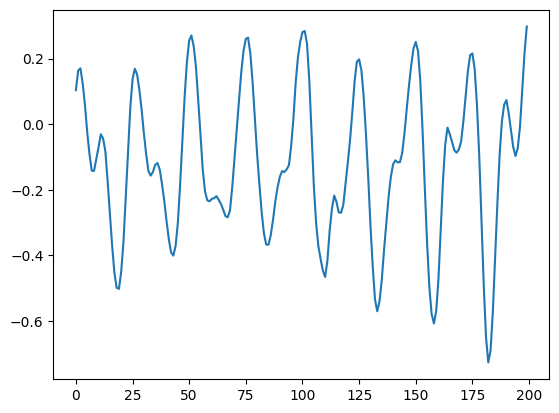

In [ ]:
# @title
# Visualize a single node variability,
plt.plot(test_wl[:200, 0])

In the picture above you may easily recognize the tydal cycle, with a period of approximately 24 hours.

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:1677: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  result = super().scatter(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


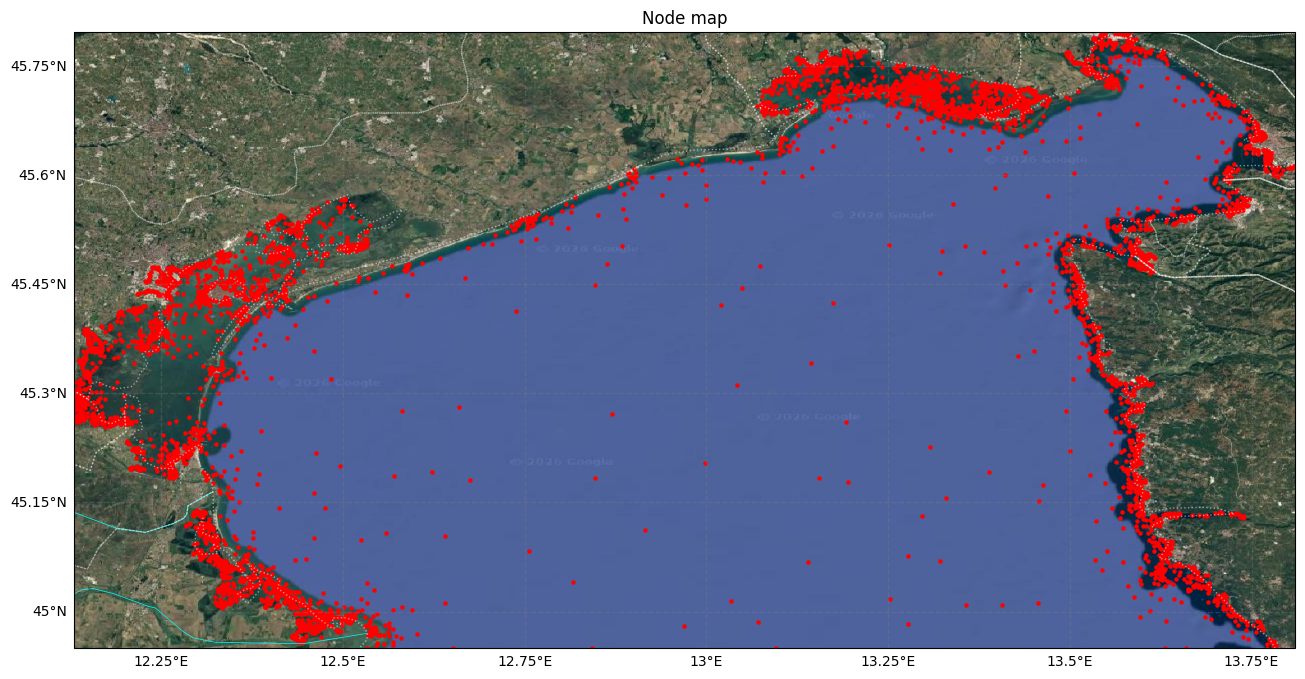

In [ ]:
# @title
# Create figure and map
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
(lat_min, lat_max), (lon_min, lon_max) = (lat_vec.min(), lat_vec.max()), (lon_vec.min(), lon_vec.max())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

stamen_terrain = cimgt.GoogleTiles(style='satellite')
ax.add_image(stamen_terrain, 10)

ax.add_feature(cfeature.RIVERS, edgecolor='cyan', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='white', alpha=0.5)
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='white', alpha=0.5)

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = gl.right_labels = False

# Plot red dots
# Note: Ensure data is visible against the varied satellite background
sc = ax.scatter(lon_vec, lat_vec, cmap="viridis", c="r", s=5, marker='o', transform=ccrs.PlateCarree(), vmin=0.07, vmax=0.15)
# Increased 's' (size) slightly to make dots visible against satellite texture

plt.title(f'Node map')
plt.savefig("graphical_visualization.png", dpi=400)
plt.show()

# What to deliver

The problem consists in inferring the water level for all nodes in the test set (year 2020).

The solution must be evaluated using RMSE with respect to the given test values.





As an indicative baseline, you may consider persistence, namely using the water level of the previous timestep to predict the current value:

In [ ]:
print(f"persistence baseline: {RMSE(test_wl[:-1],test_wl[1:]):.4f}")

persistence baseline: 0.0859


Any marginal improvement w.r.t. the baseline is significant.

As usual, you are supposed to upload a single notebook with your solution, evidence of training, and the final RMSE.

Please note that the model **cannot use** sea levels of previous times steps.

# Solution

### 0. Imports and first checks

In [14]:
!pip install torchinfo

In [15]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader, RandomSampler
from tqdm.notebook import tqdm
from torchinfo import summary

Analyzing data values

In [ ]:
# @title
# DEBUGGING - Analyzing all data
def analyze_array(name, arr):
    print(f"--- {name} ---")
    print(f"Shape: {arr.shape}, Data type: {arr.dtype}")

    # HANDLING FOR ERA5
    if "ERA5" in name and arr.ndim == 4:
        # arr shape is (3, Time, Height, Width)
        channel_names = ["Wind U", "Wind V", "Pressure"]

        for i, channel_name in enumerate(channel_names):
            sub_arr = arr[i] # Extract just that channel
            print(f"  Channel {i} [{channel_name}]:")
            print(f"    Mean: {np.mean(sub_arr):10.4f} | Std: {np.std(sub_arr):10.4f}")
            print(f"    Min : {np.min(sub_arr):10.4f} | Max : {np.max(sub_arr):10.4f}")

    # HANDLING FOR OTHERS
    else:
        print(f"Mean: {np.mean(arr):.4f}, Std: {np.std(arr):.4f}")
        print(f"Min : {np.min(arr):.4f}, Max : {np.max(arr):.4f}")
        # Print a small sample
        flat = arr.flatten()
        print(f"Sample: {flat[:5]}")
    print("")

# For tvecs
def inspect_time_vector(name, tvec):
    print(f"--- Inspecting {name} ---")
    components = ["Year", "Month", "Day", "Hour", "Minute", "Second"]

    for i, label in enumerate(components):
        row_data = tvec[i, :].astype(int)
        unique_vals = np.unique(row_data)

        if len(unique_vals) <= 24:
            print(f"{label:<7}: {unique_vals}")
        else:
            print(f"{label:<7}: {row_data[:10]} ... (showing first 10 samples)")

    print("")

# Run the analysis
analyze_array("Latitude", lat_vec)
analyze_array("Longitude", lon_vec)
analyze_array("Train Water Level", train_wl)
analyze_array("Train Ephemerides", train_ephem)
analyze_array("Train ERA5", train_era5)

analyze_array("Test Water Level", test_wl)
analyze_array("Test Ephemerides", test_ephem)
analyze_array("Test ERA5", test_era5)

# Inspect time vectors
inspect_time_vector("Train Time Vector", train_tvec)
inspect_time_vector("Test Time Vector", test_tvec)

--- Latitude ---
Shape: (5000,), Data type: float32
Mean: 45.4158, Std: 0.2568
Min : 44.9497, Max : 45.7971
Sample: [45.64554 45.2307  45.55628 45.06883 45.76137]

--- Longitude ---
Shape: (5000,), Data type: float32
Mean: 12.9296, Std: 0.5794
Min : 12.1299, Max : 13.8104
Sample: [13.10273 13.59887 13.72958 12.33306 13.19844]

--- Train Water Level ---
Shape: (87648, 5000), Data type: float32
Mean: 0.0184, Std: 0.2415
Min : -0.9146, Max : 1.2356
Sample: [0.52342933 0.46823442 0.49735016 0.38768214 0.5276155 ]

--- Train Ephemerides ---
Shape: (6, 87648), Data type: float64
Mean: 0.5108, Std: 0.2781
Min : 0.0000, Max : 1.0000
Sample: [0.0438392  0.04765848 0.05546279 0.0667023  0.0806117 ]

--- Train ERA5 ---
Shape: (3, 87648, 5, 9), Data type: float64
  Channel 0 [Wind U]:
    Mean:    -1.0705 | Std:     2.3786
    Min :   -16.4458 | Max :    13.4441
  Channel 1 [Wind V]:
    Mean:    -0.4711 | Std:     2.4842
    Min :   -18.9776 | Max :    17.8894
  Channel 2 [Pressure]:
    Mean: 10

### 1. Dataset definition and Preprocessing

Configuration

We process 72-hour intervals (3 days), to capture the decay of storm surges and seiche oscillations.
Due to the limited computational capabilities the training uses only a subsample of the training data.

In [16]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEQ_LEN = 72  # Lookback window (we look at past SEQ_LEN hours)
INPUT_DIM = 135 + 6 + 4 # ERA5 + Ephem + Time (then +2 for lat/lon)
BATCH_SIZE = 1024
HIDDEN_SIZE = 160 # Increased along seqlen from 128,48 to 160,72
LAYERS = 2
LR = 0.001
EPOCHS = 15
SAMPLES_PER_EPOCH = 2000 * BATCH_SIZE # Maybe increase?

Computing means/stds for weather (wind u/v and pressure data) and for water level

In [17]:
# Weather stats
era5_means = np.mean(train_era5, axis=(1,2,3)).reshape(3, 1, 1, 1)
era5_stds = np.std(train_era5, axis=(1,2,3)).reshape(3, 1, 1, 1)
era5_stats = (era5_means, era5_stds)

# Water level stats
wl_means = np.mean(train_wl, axis=0)
wl_stds = np.std(train_wl, axis=0)
wl_stats = (wl_means, wl_stds)

Dataset Class

The dataset constructs a 147-dimensional feature vector for each timestep in the sequence, combining global atmospheric context with precise local and temporal identifiers: this allows the model to infer local water levels based on the state of the entire Adriatic region.

Input Vector Composition (147 Features):
*   **Global Weather Context (135 dims)**: The entire ERA5 weather grid (3x5x9) is normalized and flattened into a dense vector. This allows the model to detect even distant storm surges.
*   **Ephemerides (6 dims)**: Normalized positions of the Sun and Moon, essential for predicting tides.
*   **Cyclical Time Embeddings (4 dims)**: Sine and Cosine transformations of the Hour and Month data. This provides a continuous signal  to help the model synchronize with diurnal thermal winds and seasonal water level variations.
*   **Node Coordinates (2 dims)**: Min-Max scaled Latitude and Longitude ([0,1]) which identify the specific node.

Target processing:
*   **Per-Node Normalization**: Water levels are normalized *per-node*. This ensures the loss function treats different nodes with equal importance.

In [18]:
class AdriaticDataset(Dataset):
    def __init__(self, wl, ephem, era5, tvec, lat, lon, era5_stats, wl_stats, seq_len, is_test=False):
        self.wl = wl  # Water level matrix (Time, Nodes)
        self.ephem = ephem.T # Transposed ephemerides for easy slicing (Time, 6)

        # We process the whole grid
        self.era5 = era5 # (3, Time, 5, 9)
        self.era5_means, self.era5_stds = era5_stats

        self.wl_means, self.wl_stds = wl_stats

        # Cyclical time features
        # tvec shape is (6, Time). Row 1 is Month, Row 3 is Hour
        # We create 4 new features: Sin/Cos of Hour, Sin/Cos of Month

        months = tvec[1, :]
        hours = tvec[3, :]

        self.time_embeds = np.stack([
            np.sin(2 * np.pi * hours / 24.0),
            np.cos(2 * np.pi * hours / 24.0),
            np.sin(2 * np.pi * months / 12.0),
            np.cos(2 * np.pi * months / 12.0)
        ], axis=1) # (Time, 4)

        # Normalize Coordinates
        self.lat = (lat - lat.min()) / (lat.max() - lat.min() + 1e-6)   # + 1e-6 to avoid division by 0
        self.lon = (lon - lon.min()) / (lon.max() - lon.min() + 1e-6)

        self.seq_len = seq_len
        self.num_nodes = wl.shape[1]
        self.num_times = wl.shape[0]

        # Total valid time steps (considering SEQ_LEN)
        self.valid_times = self.num_times - seq_len
        self.length = self.valid_times * self.num_nodes

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        # Map linear index to (time, node)
        time_idx = (idx // self.num_nodes) + self.seq_len
        node_idx = idx % self.num_nodes

        # 1. Location Features (2)
        n_lat = self.lat[node_idx]
        n_lon = self.lon[node_idx]

        # 2. Ephemerides (6)
        # slice from t-SEQ_LEN to t
        seq_ephem = torch.tensor(self.ephem[time_idx - self.seq_len : time_idx], dtype=torch.float32)

        # 3. Dynamic Features (the entire 5x9 weather grid for the time window)
        raw_era5 = self.era5[:, time_idx - self.seq_len : time_idx, :, :] # (3, Seq, 5, 9)
        # Normalize
        norm_era5 = (raw_era5 - self.era5_means) / (self.era5_stds + 1e-6)
        # Flatten the spatial dimensions: (3, Seq, 5, 9) -> (Seq, 3*5*9) -> (Seq, 135)
        norm_era5 = np.transpose(norm_era5, (1, 0, 2, 3)) # Transpose first to get (Seq, 3, 5, 9) then flatten
        seq_era5 = torch.tensor(norm_era5.reshape(self.seq_len, -1), dtype=torch.float32)

        # 4. Time Embeddings (4)
        seq_time = torch.tensor(self.time_embeds[time_idx - self.seq_len : time_idx], dtype=torch.float32)

        # 5. Normalized water level (target)
        raw_y = self.wl[time_idx, node_idx]
        norm_y = (raw_y - self.wl_means[node_idx]) / (self.wl_stds[node_idx] + 1e-6)

        # Combine
        # Input Size: Ephem(6) + ERA5(135) + Time(4) + Lat(1) + Lon(1) = 147
        seq_lat = torch.tensor(n_lat, dtype=torch.float32).expand(self.seq_len, 1)
        seq_lon = torch.tensor(n_lon, dtype=torch.float32).expand(self.seq_len, 1)

        batch_x = torch.cat([seq_ephem, seq_era5, seq_time, seq_lat, seq_lon], dim=1)
        batch_y = torch.tensor(norm_y, dtype=torch.float32)

        return batch_x, batch_y

### 2. Model

The model initially separates global atmospheric forces from local geographic responses:

1.   The "dynamic inputs" (Global ERA5 grid, Ephemerides, and Time Embeddings) are compressed via a dense projection layer, turning them into a compact latent representation, extracting key atmospheric patterns before temporal processing.

2.   The coordinates (Lat/Lon) are processed by a separate MLP to generate a 32-dimensional "Location Embedding". This effectively teaches the network to recognize each specific node.

3.   The weather features are fused with the location embedding and fed into a Gated Recurrent Unit (GRU). This recurrent layer tracks the momentum of storm surges and basin resonance (seiches) over the 72-hour sequence (SEQ_LEN).

4.   A skip connection re-injects the location embedding directly into the final regressor head. This ensures that the final prediction is scaled specifically to the node's local characteristics, regardless of the global weather state.

Regularization is applied via Dropout and Weight Decay to prevent overfitting.

In [19]:
# Model architecture
class WaterLevelPredictor(nn.Module):
    def __init__(self, input_dim, static_dim=2, hidden_dim=160, layers=2):
        super(WaterLevelPredictor, self).__init__()

        # Feature Projection: Compress the 135 weather features + 6 ephem to something dense
        self.feature_projector = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.GELU(),  # Smoother than ReLU, maybe better for physical data
            nn.Dropout(0.2)
        )

        # Spatial Encoder: embeds Lat/Lon to a 32-dimensional vector
        self.spatial_embedding = nn.Sequential(
            nn.Linear(static_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 32)
        )

        # 2. Temporal Encoder (GRU, Gated Recurrent Unit)
        # Input to GRU will be: Dynamic Featuress (9) + Spatial Embed (32) = 41
        self.gru = nn.GRU(hidden_dim + 32, hidden_dim, num_layers=layers,
                          batch_first=True, dropout=0.3)

        self.layer_norm = nn.LayerNorm(hidden_dim)

        # 3. Regressor Head
        # Skip connection: We feed the spatial embedding again at the end
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim + 32, 64),
            nn.GELU(),  # Smoother than ReLU, maybe better for physical data
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # x: (Batch, Seq, 143) [6 Ephem, 135 ERA5, 2 LatLon]

        # Split features
        x_dynamic_raw = x[:, :, :-2] # Everything except lat/lon
        x_static_raw = x[:, 0, -2:]  # Lat/Lon (taken from first step)

        # 1. Project High-Dim Weather Data
        x_dyn_emb = self.feature_projector(x_dynamic_raw) # (Batch, Seq, Hidden)

        # 2. Embed Location
        loc_emb = self.spatial_embedding(x_static_raw) # (Batch, 32)
        loc_emb_seq = loc_emb.unsqueeze(1).repeat(1, x_dyn_emb.size(1), 1)

        # 3. Combine & Recurse
        x_combined = torch.cat([x_dyn_emb, loc_emb_seq], dim=2)
        out, _ = self.gru(x_combined)

        # 4. Predict
        last_step = self.layer_norm(out[:, -1, :])
        final_input = torch.cat([last_step, loc_emb], dim=1)

        return self.fc(final_input).squeeze()

In [20]:
# Model definition
model = WaterLevelPredictor(input_dim=INPUT_DIM, static_dim=2, hidden_dim=HIDDEN_SIZE, layers=LAYERS).to(DEVICE)
model.load_state_dict(torch.load("weights_160_2_time.pth", map_location=DEVICE))  # DEBUGGING - Load model
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=0.01) # AdamW better at regularization, weight_decay against overfitting
criterion = nn.MSELoss() # Minimizing MSE is equivalent to minimizing RMSE

In [21]:
# Model Summary
summary(model)

Layer (type:depth-idx)                   Param #
WaterLevelPredictor                      --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       23,360
│    └─LayerNorm: 2-2                    320
│    └─GELU: 2-3                         --
│    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
│    └─Linear: 2-5                       96
│    └─ReLU: 2-6                         --
│    └─Linear: 2-7                       1,056
├─GRU: 1-3                               324,480
├─LayerNorm: 1-4                         320
├─Sequential: 1-5                        --
│    └─Linear: 2-8                       12,352
│    └─GELU: 2-9                         --
│    └─Dropout: 2-10                     --
│    └─Linear: 2-11                      65
Total params: 362,049
Trainable params: 362,049
Non-trainable params: 0

### 3. Training

Setup training

We employ a **Random Sampler** to train on a fixed number of samples per epoch (subsampling), hastening training time.
The training utilizes the **OneCycleLR scheduler**, designed to achieve precise convergence by warming up the learning rate to encourage exploration before decaying it for high-precision convergence.

In [22]:
# Create datasets, sampler, loaders and the scheduler
train_dataset = AdriaticDataset(
    train_wl, train_ephem, train_era5, train_tvec, lat_vec, lon_vec,
    era5_stats, wl_stats, seq_len=SEQ_LEN
)
test_dataset = AdriaticDataset(
    test_wl, test_ephem, test_era5, test_tvec, lat_vec, lon_vec,
    era5_stats, wl_stats, seq_len=SEQ_LEN, is_test=True
)

train_sampler = RandomSampler(train_dataset, replacement=True, num_samples=SAMPLES_PER_EPOCH)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler,
                          num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE*4, shuffle=False,
                         num_workers=2, pin_memory=True)

# Starts with low LR, ramps it up (jumps out of local minima) then decays to near zero
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=LR, total_steps=len(train_loader) * EPOCHS, pct_start=0.3
)

Training Loop

In [ ]:
print(f"Starting training on {DEVICE}...")

model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for x, y in pbar:
        x, y = x.to(DEVICE), y.to(DEVICE)

        optimizer.zero_grad() # Start each batch fresh

        output = model(x)
        loss = criterion(output, y)
        loss.backward()

        # Clip gradients for stability
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        scheduler.step() # Update LR per batch

        total_loss += loss.item()
        pbar.set_postfix({'loss': f"{loss.item():.4f}", 'lr': f"{scheduler.get_last_lr()[0]:.6f}"})

    # Compute RMSE (Z-Scores)
    avg_mse_norm = total_loss / len(train_loader)
    avg_rmse_norm = np.sqrt(avg_mse_norm)

    print(f"Epoch {epoch+1} - Train RMSE: {avg_rmse_norm:.4f} (normalized z-scores)")

Starting training on cuda...


Epoch 1/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 1 - Train RMSE: 0.6893 (normalized z-scores)


Epoch 2/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 2 - Train RMSE: 0.3903 (normalized z-scores)


Epoch 3/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 3 - Train RMSE: 0.3260 (normalized z-scores)


Epoch 4/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 4 - Train RMSE: 0.2946 (normalized z-scores)


Epoch 5/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 5 - Train RMSE: 0.2593 (normalized z-scores)


Epoch 6/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 6 - Train RMSE: 0.2331 (normalized z-scores)


Epoch 7/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 7 - Train RMSE: 0.2155 (normalized z-scores)


Epoch 8/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 8 - Train RMSE: 0.2026 (normalized z-scores)


Epoch 9/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 9 - Train RMSE: 0.1903 (normalized z-scores)


Epoch 10/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 10 - Train RMSE: 0.1760 (normalized z-scores)


Epoch 11/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 11 - Train RMSE: 0.1624 (normalized z-scores)


Epoch 12/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 12 - Train RMSE: 0.1534 (normalized z-scores)


Epoch 13/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 13 - Train RMSE: 0.1458 (normalized z-scores)


Epoch 14/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 14 - Train RMSE: 0.1407 (normalized z-scores)


Epoch 15/15:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 15 - Train RMSE: 0.1381 (normalized z-scores)


The training log shows an effective convergence. With per-node normalization implemented, the final RMSE of 0.1381 signifies that the model's average prediction error is approximately 0.14 standard deviations from the true water level. This metric confirms that the model has successfully internalized the physics of the problem rather than simply memorizing mean water levels.

The training followed the established "One Cycle" curve, visible in the learning rate (lr) progression:
1.   **Warmup (1-5)**: The lr ramped from near-zero to 0.001. The error dropped rapidly as the model learned to ignore the bias and focus on the relative fluctuations.
2.   **Exploration (6-10)**: A sustained high lr allowed the model to navigate the loss landscape, preventing it from getting stuck in shallow solutions. The error continued to decrease steadily.
3.   **Cooldown (11-15)**: As the lr decayed to zero, the model fine-tuned its weights to maximize precision. The final "squeeze" kept reducing the error (from 0.176 to 0.138), indicating that the network capacity was well-utilized without overfitting.

In [ ]:
# DEBUGGING - Save the model weights
torch.save(model.state_dict(), "weights_160_2_time.pth")

### 4. Evaluation

Quick Evaluation

In [ ]:
# @title
# QUICK, INCOMPLETE EVALUATION
from torch.utils.data import Subset

# Select random indices
total_samples = len(test_dataset)
num_subset = int(total_samples * 0.01) # 1% of data
indices = np.random.choice(total_samples, num_subset, replace=False)

# Subset loader
subset_dataset = Subset(test_dataset, indices)
fast_loader = DataLoader(
    subset_dataset,
    batch_size=8192,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"Evaluating on subset of {num_subset} samples...")
model.eval()
predictions_norm = []
ground_truth_norm = []

with torch.no_grad():
    for x, y in tqdm(fast_loader, desc="Fast Inference"):
        x = x.to(DEVICE)
        with torch.amp.autocast('cuda', enabled=True):
            out = model(x)
        predictions_norm.append(out.cpu().numpy())
        ground_truth_norm.append(y.cpu().numpy())

pred_subset = np.concatenate(predictions_norm)
true_subset = np.concatenate(ground_truth_norm)

# Rough De-normalization (Using global averages for quick check)
# Since we shuffled indices, we can't easily map back to specific nodes for vector denorm.
# This will be slightly higher than the real per-node RMSE, but good for relative check.
global_mean = np.mean(wl_means)
global_std = np.mean(wl_stds)

pred_meters = (pred_subset * global_std) + global_mean
true_meters = (true_subset * global_std) + global_mean

print(f"ESTIMATED RMSE (Subset): {RMSE(true_meters, pred_meters):.4f}")

Evaluating on subset of 435600 samples...


Fast Inference:   0%|          | 0/54 [00:00<?, ?it/s]

ESTIMATED RMSE (Subset): 0.0862


Complete Evaluation

In [23]:
print("Evaluating on Test Set...")
model.eval()
predictions_norm = []
ground_truth_norm = []

with torch.no_grad():
    for x, y in tqdm(test_loader, desc="Inference"):
        x = x.to(DEVICE)
        out = model(x)
        predictions_norm.append(out.cpu().numpy())
        ground_truth_norm.append(y.cpu().numpy())

pred_array_norm = np.concatenate(predictions_norm)  # predictions array
true_array_norm = np.concatenate(ground_truth_norm) # ground truth array

# PER-NODE DENORMALIZATION
# The test set is ordered: Time0[Node0..N], Time1[Node0..N]...
# So we just repeat the stats vector (N nodes) for the number of time steps
num_test_samples = len(pred_array_norm)
valid_times_test = num_test_samples // 5000 # number of full timestamps
all_stds = np.tile(wl_stds, valid_times_test)
all_means = np.tile(wl_means, valid_times_test)
# Denormalize
pred_meters = (pred_array_norm * all_stds) + all_means
true_meters = (true_array_norm * all_stds) + all_means

final_rmse = RMSE(true_meters, pred_meters)

persistence_baseline = RMSE(test_wl[:-1],test_wl[1:])

print(f"FINAL TEST RMSE: {final_rmse:.4f}")
print(f"Baseline Persistence RMSE: {persistence_baseline:.4f}")

if final_rmse < persistence_baseline:
    improvement = (persistence_baseline - final_rmse) / persistence_baseline * 100
    print(f"Baseline beaten by {improvement:.1f}%")

Evaluating on Test Set...


Inference:   0%|          | 0/10635 [00:00<?, ?it/s]

FINAL TEST RMSE: 0.0850
Baseline Persistence RMSE: 0.0859
Baseline beaten by 1.0%


The model achieved a Test RMSE of **0.0850**, surpassing the persistence baseline of 0.0859 by about **1%**. This demonstrates that the network successfully learned to infer the state of the Northern Adriatic Sea purely from external factors (wind, pressure, time and gravitational tides), without relying on past water level data. This capability allows the model to predict storm surge onsets and seiche decays that persistence would inherently miss.

### 5. Visualization

Ground Truth - Prediction Comparison

With this plot, we can see how our prediction compares to the ground truth. While some amplitude differences are present, the prediction is "well-timed" with the ground truth in its peaks and valleys, without the lag characteristic of a persistence baseline.

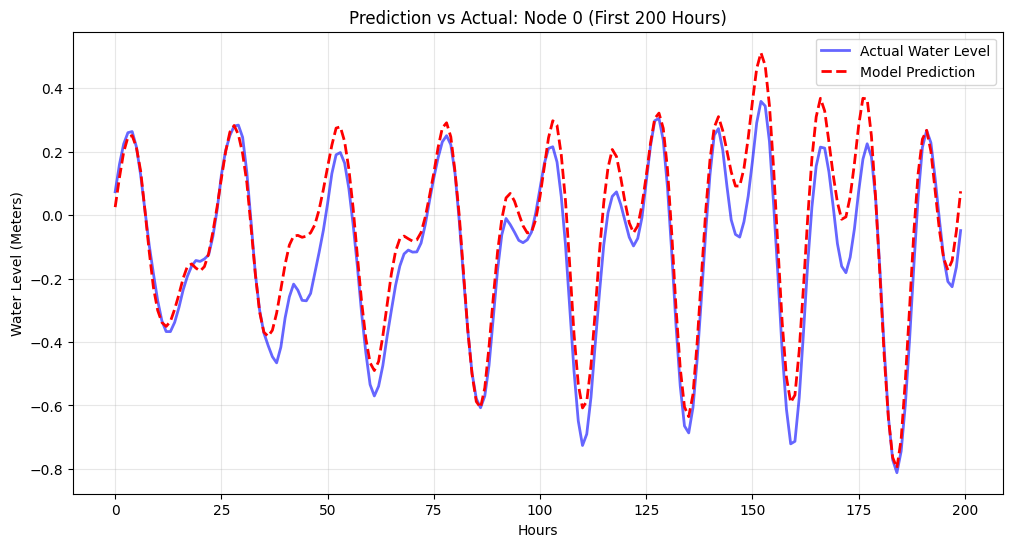

In [24]:
def visualize_specific_node(model, dataset, node_idx=0, time_steps=200, wl_stats=None):
    """
    Extracts sequence, predicts, de-normalizes and plots our prediction and the respective ground truth.
    """
    model.eval()

    # 1. Fetch indices
    num_nodes = dataset.num_nodes
    indices = [t * num_nodes + node_idx for t in range(time_steps)]

    # 2. Fetch Data
    xs = []
    ys = []
    for idx in indices:
        x, y = dataset[idx]
        xs.append(x)
        ys.append(y) # This is the NORMALIZED target (Z-score)

    # 3. Batch and Predict
    x_batch = torch.stack(xs).to(DEVICE)
    y_true_norm = np.array(ys) # Shape: (200,)

    with torch.no_grad():
        y_pred_norm = model(x_batch).cpu().numpy() # Shape: (200,)

    # 4. Denormalize
    if wl_stats:
        means_vec, stds_vec = wl_stats
        node_mean = means_vec[node_idx] # Get stats for this node
        node_std = stds_vec[node_idx]

        y_true = (y_true_norm * node_std) + node_mean
        y_pred = (y_pred_norm * node_std) + node_mean
        y_label = "Water Level (Meters)"
    else:
        y_true = y_true_norm
        y_pred = y_pred_norm
        y_label = "Water Level (Normalized Z-Scores)"

    # 5. Plot
    plt.figure(figsize=(12, 6))

    # Plot Ground Truth
    plt.plot(y_true, label='Actual Water Level', color='blue', alpha=0.6, linewidth=2)
    # Plot Prediction
    plt.plot(y_pred, label='Model Prediction', color='red', linestyle='--', linewidth=2)

    plt.title(f'Prediction vs Actual: Node {node_idx} (First {time_steps} Hours)')
    plt.xlabel('Hours')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

visualize_specific_node(model, test_dataset, node_idx=0, time_steps=200, wl_stats=(wl_means, wl_stds))

Spatial Error Analysis

Finally, we'll visualize the per-node RMSE by color on a saltellite map. The error distribution reveals robust generalization in deep waters, with expected higher deviations (lighter colors) in the shallow coastal zones, where storm surges are more extreme.

Computing spatial error distribution...
Min Error: 0.0714m | Max Error: 0.1950m


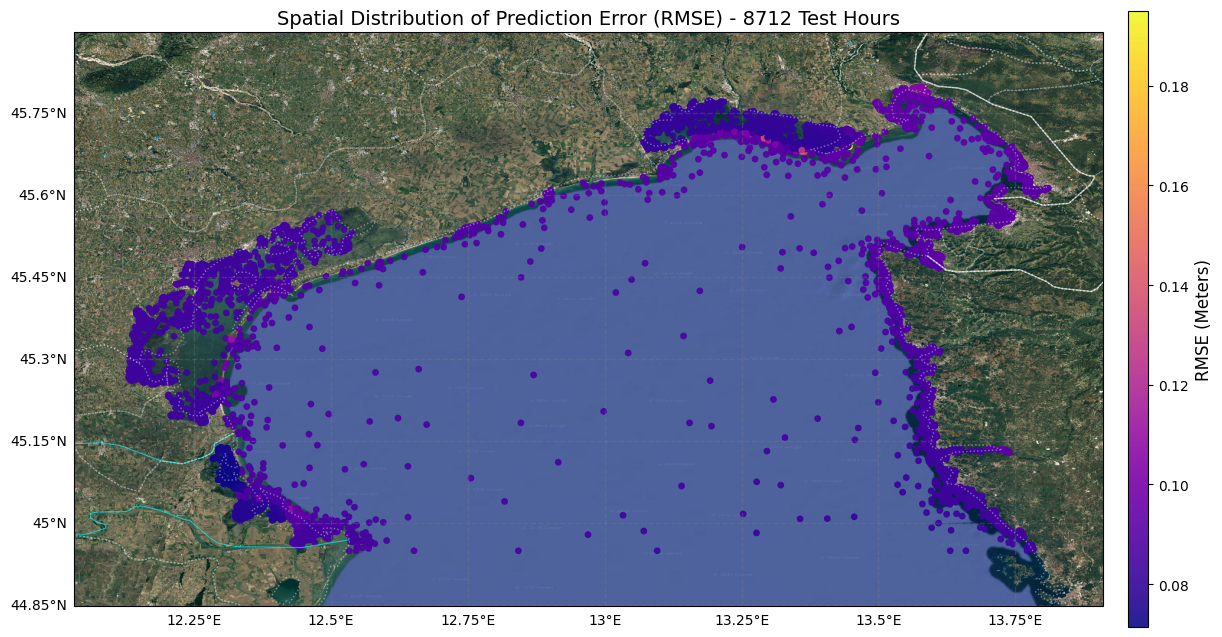

In [27]:
def plot_spatial_error_map(pred_array, true_array, lat_vec, lon_vec, num_nodes):
    """
    Calculates RMSE per node and plots it on a satellite map.
    Requires: true_meters, pred_meters (denormalized numpy arrays from evaluation)
    """
    print("Computing spatial error distribution...")

    # 1. Reshape flat arrays back to (Time, Nodes)
    n_times = len(true_array) // num_nodes
    flat_len = n_times * num_nodes

    true_grid = true_array[:flat_len].reshape(n_times, num_nodes)
    pred_grid = pred_array[:flat_len].reshape(n_times, num_nodes)

    # 2. Calculate RMSE per node (Axis 0 = Time)
    rmse_per_node = np.sqrt(np.mean(np.square(true_grid - pred_grid), axis=0))

    print(f"Min Error: {rmse_per_node.min():.4f}m | Max Error: {rmse_per_node.max():.4f}m")

    # 3. Setup map (cartoPy)
    fig, ax = plt.subplots(figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set Extent
    lat_min, lat_max = lat_vec.min(), lat_vec.max()
    lon_min, lon_max = lon_vec.min(), lon_vec.max()
    padding = 0.1
    ax.set_extent([lon_min - padding, lon_max + padding, lat_min - padding, lat_max + padding],
                  crs=ccrs.PlateCarree())

    # Add Satellite Background
    stamen_terrain = cimgt.GoogleTiles(style='satellite')
    ax.add_image(stamen_terrain, 11)

    # Add features
    ax.add_feature(cfeature.RIVERS, edgecolor='cyan', linewidth=0.8, alpha=0.6)
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='white', alpha=0.6)
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='white', alpha=0.4)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle='--')
    gl.top_labels = gl.right_labels = False

    # 4. Plot nodes colored by RMSE
    sc = ax.scatter(lon_vec, lat_vec, c=rmse_per_node, cmap="plasma",
                    s=15, marker='o', transform=ccrs.PlateCarree(), alpha=0.9)

    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, aspect=30)
    cbar.set_label('RMSE (Meters)', fontsize=12)

    plt.title(f'Spatial Distribution of Prediction Error (RMSE) - {n_times} Test Hours', fontsize=14)
    plt.savefig("spatial_error_map.png", dpi=300, bbox_inches='tight')
    plt.show()

# Usage: Pass the arrays calculated in the evaluation step
plot_spatial_error_map(pred_meters, true_meters, lat_vec, lon_vec, num_nodes=5000)